In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## The model in theory

We are going to use 4 features: The **price** itself and three extra technical indicators.
- MACD (Trend)
- Stochastics (Momentum)
- Average True Range (Volume)

## Functions

**Exponential Moving Average:** Is a type of infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. 
<img src="https://www.bionicturtle.com/images/uploads/WindowsLiveWriterGARCHapproachandExponentialsmoothingEWMA_863image_16.png">

**MACD:**  The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.
<img src="http://i68.tinypic.com/289ie1l.png">

**Stochastics oscillator:** The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods.

<img src="http://i66.tinypic.com/2vam3uo.png">

**Average True Range:** Is an indicator to measure the volalitility (NOT price direction). The largest of:
- Method A: Current High less the current Low
- Method B: Current High less the previous Close (absolute value)
- Method C: Current Low less the previous Close (absolute value)

<img src="http://d.stockcharts.com/school/data/media/chart_school/technical_indicators_and_overlays/average_true_range_atr/atr-1-trexam.png" width="400px">

Calculation:
<img src="http://i68.tinypic.com/e0kggi.png">

In [3]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    
    return Histogram

def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Price'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Price'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

## Read data

In [4]:
df = pd.read_csv('ETHUSD2.csv', nrows=10000)


#dfPrices = pd.read_csv('ETHUSD.csv', delimiter=',',usecols=[1])
#dfPrices = dfPrices.iloc[::-1]
#dfPrices["Price"] = (dfPrices["Price"].apply(lambda x: float(x[0].replace(',', '')))

In [5]:
#Separate trade price and calculate mid market price
df.rename(columns={"trade_px": "TradePrice"}, inplace=True)
dfPrices= pd.DataFrame()
dfPrices["Price"] = df[["b1", "a1"]].mean(axis=1)


In [6]:
#dfPrices[:-2]
dfPrices.tail(2)

,Price
9998,286.73
9999,286.80


In [7]:
dfPrices.head(2)

,Price
0,290.780
1,290.785


## Plot

In [8]:
price = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()

### Price

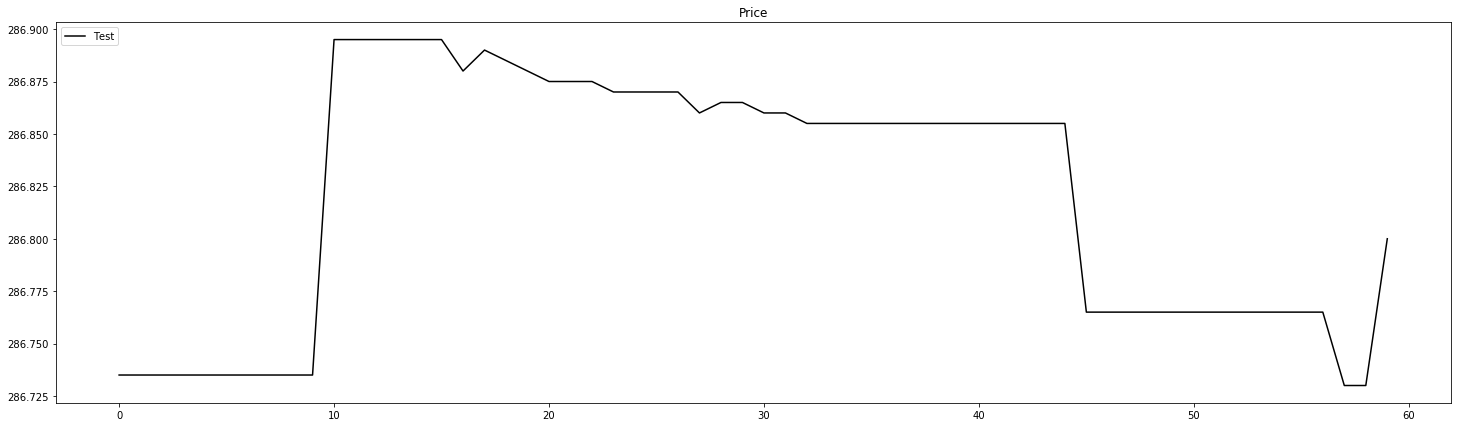

In [9]:
prices = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()
plt.figure(figsize=(25,7))
plt.plot(prices,label='Test',color='black')
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

### MACD

In [10]:
macd = MACD(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],4,12,3)

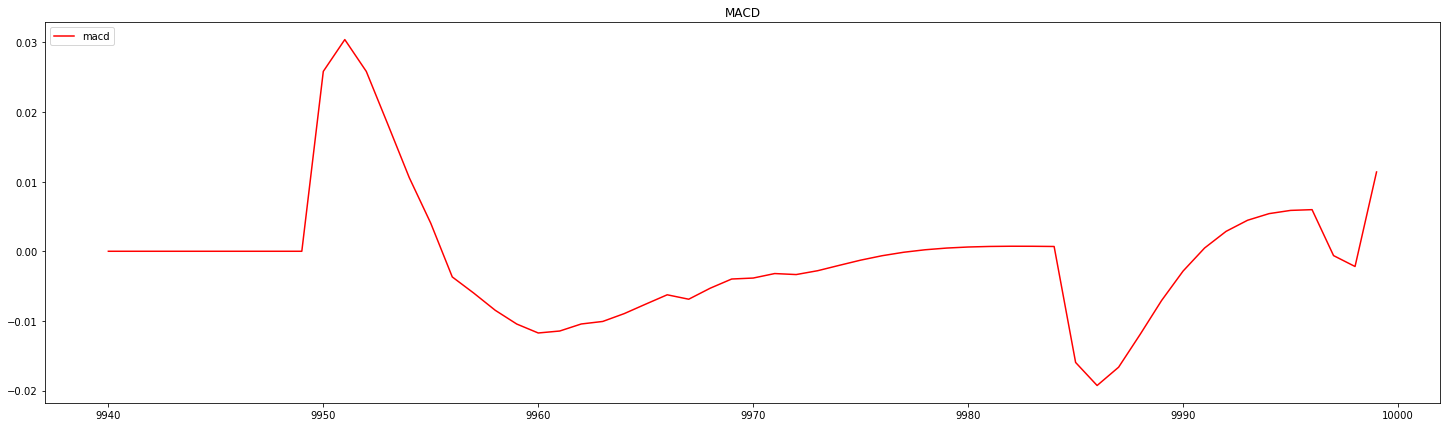

In [11]:
plt.figure(figsize=(25,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

### Stochastics Oscillator

In [12]:
stochastics = stochastics_oscillator(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],14)

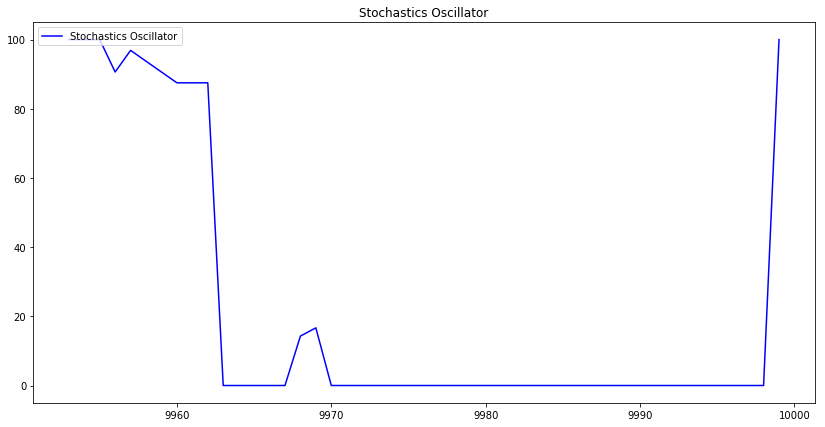

In [13]:
plt.figure(figsize=(14,7))
#First 100 points because it's too dense
plt.plot(stochastics[0:100],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

## Create complete DataFrame & Save Data

In [14]:
#Shift prices a number of rows into the future to create a training dataset
dfPriceShift = dfPrices.shift(-5)
dfPriceShift.rename(columns={'Price':'PriceTarget'}, inplace=True)

In [15]:
dfPriceShift.head(2)

,PriceTarget
0,290.925
1,290.925


In [16]:
macd = MACD(dfPrices,12,26,9)
macd.rename(columns={'Price':'MACD'}, inplace=True)

In [17]:
#stochastics = stochastics_oscillator(dfPrices,14)
#stochastics.rename(columns={'Price':'Stochastics'}, inplace=True)

In [18]:
#atr = ATR(df,14)
#atr.rename(columns={0:'ATR'}, inplace=True)

In [19]:
df["bbq1"]=df["b1"].multiply(df["bq1"], axis="index")
df["aaq1"]=df["a1"].multiply(df["aq1"], axis="index")
df["Spread"]=df["a1"]-df["b1"]
df

,id,TradePrice,trade_volume,b1,b2,b3,b4,b5,b6,b7,...,aq27,aq28,aq29,aq30,order_date_time,trades_date_time,update_type,bbq1,aaq1,Spread
0,2,0.00,0.000000,290.64,290.61,290.60,290.51,290.50,290.49,290.38,...,8.011900,11.300000,31.744415,0.010389,20170918 06:42:13.830687,20000101 00:00:00.000000,1,8.719200,87654.196000,0.28
1,4,0.00,0.000000,290.63,290.60,290.51,290.50,290.49,290.38,290.33,...,0.111000,8.011900,11.300000,31.744415,20170918 06:42:15.283817,20000101 00:00:00.000000,1,9073.468600,1275.342182,0.31
2,5,290.93,0.286487,290.63,290.60,290.51,290.50,290.49,290.38,290.33,...,0.111000,8.011900,11.300000,31.744415,20170918 06:42:15.283817,20170918 06:42:15.877565,2,9073.468600,1275.342182,0.31
3,6,290.93,0.286487,290.94,290.62,290.60,290.51,290.50,290.49,290.48,...,0.111000,8.011900,11.300000,31.744415,20170918 06:42:16.658818,20170918 06:42:15.877565,1,6223.206600,126.563250,0.01
4,8,290.93,0.286487,290.92,290.67,290.66,290.63,290.60,290.53,290.50,...,0.058900,5.496297,0.111000,8.011900,20170918 06:42:18.174597,20170918 06:42:15.877565,1,6574.501080,72.732500,0.01
5,9,290.66,0.030000,290.92,290.67,290.66,290.63,290.60,290.53,290.50,...,0.058900,5.496297,0.111000,8.011900,20170918 06:42:18.174597,20170918 06:42:18.252739,2,6574.501080,72.732500,0.01
6,10,290.92,5.596358,290.92,290.67,290.66,290.63,290.60,290.53,290.50,...,0.058900,5.496297,0.111000,8.011900,20170918 06:42:18.174597,20170918 06:42:18.299597,2,6574.501080,72.732500,0.01
7,12,290.92,5.596358,290.60,290.53,290.50,290.49,290.48,290.38,290.36,...,0.111000,8.011900,11.300000,31.744415,20170918 06:42:19.580855,20170918 06:42:18.299597,1,1399.999997,398.587800,0.34
8,14,290.64,1.550000,290.60,290.53,290.50,290.49,290.48,290.38,290.36,...,0.111000,8.011900,11.300000,31.744415,20170918 06:42:19.580855,20170918 06:42:20.659062,2,1399.999997,398.587800,0.34
9,15,290.62,0.216707,290.60,290.53,290.50,290.49,290.48,290.38,290.36,...,0.111000,8.011900,11.300000,31.744415,20170918 06:42:19.580855,20170918 06:42:20.674607,2,1399.999997,398.587800,0.34


In [20]:

vol = df["trade_volume"]
TradePrice = df["TradePrice"]
b1 = df["b1"]
b2 = df["b2"]
b3 = df["b3"]
b4 = df["b4"]
b5 = df["b5"]
b6 = df["b6"]
b7 = df["b7"]
b8 = df["b8"]
b9 = df["b9"]
b10 = df["b10"]
a1 = df["a1"]
a2 = df["a2"]
a3 = df["a3"]
a4 = df["a4"]
a5 = df["a5"]
a6 = df["a6"]
a7 = df["a7"]
a8 = df["a8"]
a9 = df["a9"]
a10 = df["a10"]

bq1 = df["bq1"]
bq2 = df["bq2"]
bq3 = df["bq3"]
bq4 = df["bq4"]
bq5 = df["bq5"]
bq6 = df["bq6"]
bq7 = df["bq7"]
bq8 = df["bq8"]
bq9 = df["bq9"]
bq10 = df["bq10"]
aq1 = df["aq1"]
aq2 = df["aq2"]
aq3 = df["aq3"]
aq4 = df["aq4"]
aq5 = df["aq5"]
aq6 = df["aq6"]
aq7 = df["aq7"]
aq8 = df["aq8"]
aq9 = df["aq9"]
aq10 = df["aq10"]

bbq1 = df["bbq1"]
aaq1 = df["aaq1"]
Spread = df["Spread"]

In [21]:
final_data = pd.concat([dfPrices, dfPriceShift, macd,TradePrice, vol,b1,a1, bq1, aq1, Spread], axis=1)
# b1, b2, b3, b4, b5, b6, b7, b8, b9, b10,
#                        a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,
#                        bq1,bq2,bq3,bq4,bq5,bq6,bq7,bq8,bq9,bq10, 
#                       aq1, aq2, aq3, aq4, aq5, aq6, aq7, aq8, aq9, aq10, 
# Delete the entries with missing values (where the stochastics couldn't be computed yet) because have a lot of datapoints ;)
#final_data = final_data.dropna()

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Price           10000 non-null float64
PriceTarget     9995 non-null float64
MACD            10000 non-null float64
TradePrice      10000 non-null float64
trade_volume    10000 non-null float64
b1              10000 non-null float64
a1              10000 non-null float64
bq1             10000 non-null float64
aq1             10000 non-null float64
Spread          10000 non-null float64
dtypes: float64(10)
memory usage: 781.3 KB


In [23]:
final_data

,Price,PriceTarget,MACD,TradePrice,trade_volume,b1,a1,bq1,aq1,Spread
0,290.780,290.925,0.000000,0.00,0.000000,290.64,290.92,0.030000,301.300000,0.28
1,290.785,290.925,0.000053,0.00,0.000000,290.63,290.94,31.220000,4.383523,0.31
2,290.785,290.770,0.000053,290.93,0.286487,290.63,290.94,31.220000,4.383523,0.31
3,290.945,290.770,0.004142,290.93,0.286487,290.94,290.95,21.390000,0.435000,0.01
4,290.925,290.770,0.004811,290.93,0.286487,290.92,290.93,22.599000,0.250000,0.01
5,290.925,290.770,0.004716,290.66,0.030000,290.92,290.93,22.599000,0.250000,0.01
6,290.925,290.785,0.004295,290.92,5.596358,290.92,290.93,22.599000,0.250000,0.01
7,290.770,290.785,-0.002337,290.92,5.596358,290.60,290.94,4.817619,1.370000,0.34
8,290.770,290.785,-0.006123,290.64,1.550000,290.60,290.94,4.817619,1.370000,0.34
9,290.770,290.785,-0.008147,290.62,0.216707,290.60,290.94,4.817619,1.370000,0.34


In [24]:
final_data.to_csv('ETHUSD_TechnicalIndicators.csv',index=False)